# Foraging toolkit demo - follower birds

## Outline
* [Introduction](##introduction)
* [Simulation](#simulation)
* [Derived quantities](#derived-quantities)
* [Inference](#inference)

## Introduction

In this notebook we use the foraging toolkit to simulate agents that move toward other agents. 

The users are advised to familiarize themselves first with the `random_foragers.ipynb` demo, which contains a detailed explanation of the various commands and methods used in this notebook.

The follower behavior is in contrast to _hungry agents_, who care only about food location (see the `hungry_foragers.ipynb` demo notebook).

The main reference is [1], in particular Fig.2.

---

[1] R. Urbaniak, M. Xie, and E. Mackevicius, “Linking cognitive strategy, neural mechanism, and movement statistics in group foraging behaviors,” Sci Rep, vol. 14, no. 1, p. 21770, Sep. 2024, [doi: 10.1038/s41598-024-71931-0.](https://www.nature.com/articles/s41598-024-71931-0)

In [1]:
# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import dill
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio

pio.renderers.default = "notebook"

import collab.foraging.toolkit as ft
from collab.foraging import random_hungry_followers as rhf

logging.basicConfig(format="%(message)s", level=logging.INFO)

# users can ignore smoke_test -- it's for automatic testing on GitHub,
# to make sure the notebook runs on future updates to the repository
smoke_test = "CI" in os.environ
num_frames = 5 if smoke_test else 50
num_svi_iters = 10 if smoke_test else 1000
num_samples = 10 if smoke_test else 1000

notebook_starts = time.time()

## Simulation


**Simulation of follower foragers**

- **Initialization**
    - Initialize the grid with a specified grid size
    - Randomly place `num_rewards` rewards
    - Normalize the probabilities for forager step size
- **Forward Simulation**
    - For each frame:
        - Update visibility for foragers
        - Compute proximity scores for all foragers, with local maxima at other foragers' locations and exponential decay.
        - For each forager:
            - Weight proximity scores with the forager's visibility scores
            - Sort accessible points by the above weighted score
            - Move forager to a randomly chosen position from among top 10 ranking points above

- **Update Rewards**
    - At each frame, remove a reward if a forager is next to it, starting from that frame onward.


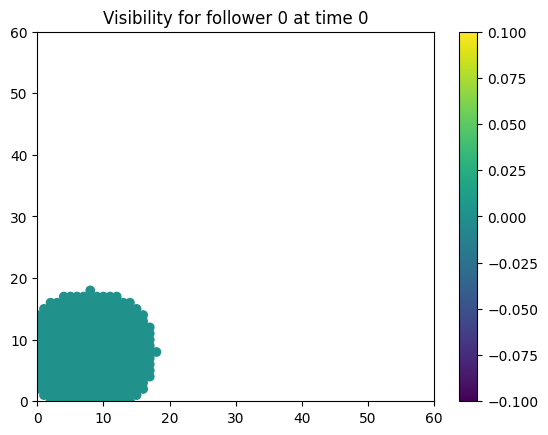

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0     9  23  10.000000          10           0  6.123234e-17        1     1   
209  22  16   7.615773           3           7  3.658198e-01        1     1   
216  22  23   3.000000           3           0  8.910065e-01        1     1   
215  22  22   3.162278           3           1  8.791459e-01        1     1   
214  22  21   3.605551           3           2  8.438604e-01        1     1   
213  22  20   4.242641           3           3  7.860321e-01        1     1   
212  22  19   5.000000           3           4  7.071068e-01        1     1   
211  22  18   5.830952           3           5  6.090582e-01        1     1   
210  22  17   6.708204           3           6  4.943389e-01        1     1   
208  22  15   8.544004           3           8  2.267187e-01        1     1   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

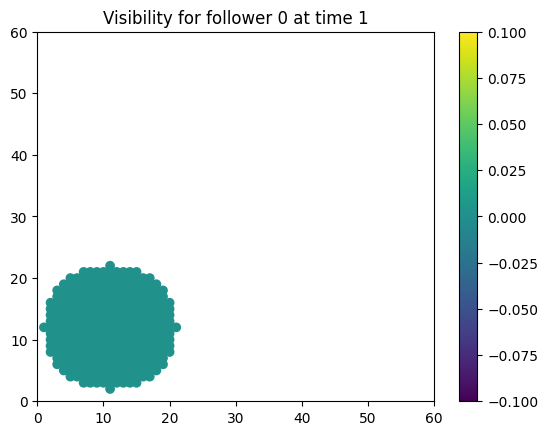

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    12  15  10.000000        10.0         0.0  6.123234e-17        1     2   
209  25   8   7.615773         3.0         7.0  3.658198e-01        1     2   
216  25  15   3.000000         3.0         0.0  8.910065e-01        1     2   
215  25  14   3.162278         3.0         1.0  8.791459e-01        1     2   
214  25  13   3.605551         3.0         2.0  8.438604e-01        1     2   
213  25  12   4.242641         3.0         3.0  7.860321e-01        1     2   
212  25  11   5.000000         3.0         4.0  7.071068e-01        1     2   
211  25  10   5.830952         3.0         5.0  6.090582e-01        1     2   
210  25   9   6.708204         3.0         6.0  4.943389e-01        1     2   
208  25   7   8.544004         3.0         8.0  2.267187e-01        1     2   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

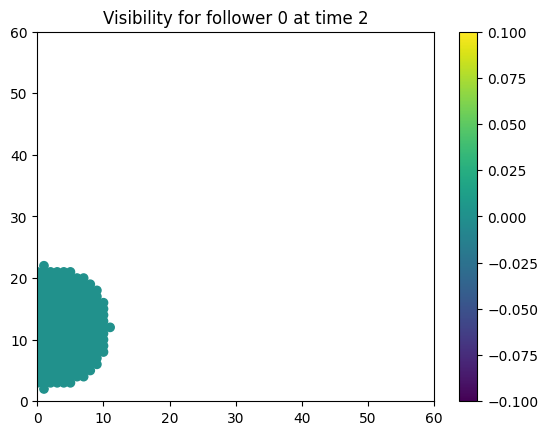

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    15  13  10.000000        10.0         0.0  6.123234e-17        1     3   
209  28   6   7.615773         3.0         7.0  3.658198e-01        1     3   
216  28  13   3.000000         3.0         0.0  8.910065e-01        1     3   
215  28  12   3.162278         3.0         1.0  8.791459e-01        1     3   
214  28  11   3.605551         3.0         2.0  8.438604e-01        1     3   
213  28  10   4.242641         3.0         3.0  7.860321e-01        1     3   
212  28   9   5.000000         3.0         4.0  7.071068e-01        1     3   
211  28   8   5.830952         3.0         5.0  6.090582e-01        1     3   
210  28   7   6.708204         3.0         6.0  4.943389e-01        1     3   
208  28   5   8.544004         3.0         8.0  2.267187e-01        1     3   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

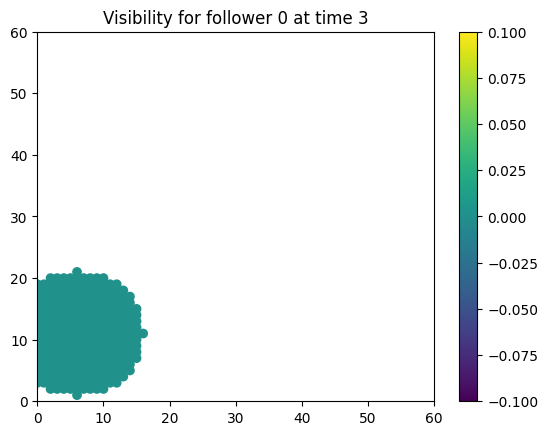

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    18   6  10.000000        10.0         0.0  6.123234e-17        1     4   
184  31   4   3.605551         3.0         2.0  8.438604e-01        1     4   
190  31  10   5.000000         3.0         4.0  7.071068e-01        1     4   
189  31   9   4.242641         3.0         3.0  7.860321e-01        1     4   
188  31   8   3.605551         3.0         2.0  8.438604e-01        1     4   
187  31   7   3.162278         3.0         1.0  8.791459e-01        1     4   
186  31   6   3.000000         3.0         0.0  8.910065e-01        1     4   
185  31   5   3.162278         3.0         1.0  8.791459e-01        1     4   
183  31   3   4.242641         3.0         3.0  7.860321e-01        1     4   
175  30  11   5.385165         2.0         5.0  6.630581e-01        1     4   

     proximity  proximity_standardized  
0            0                     0.0  
184          0                     0.0  

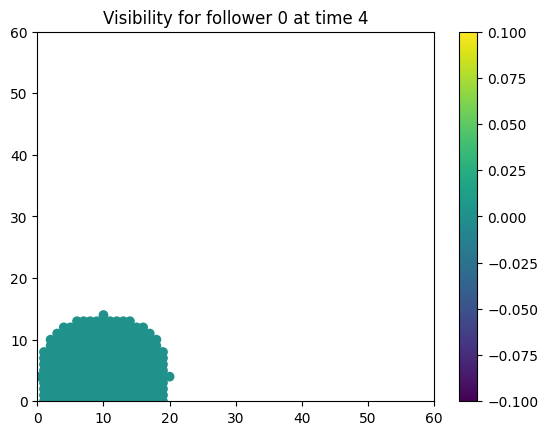

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    21   7  10.000000        10.0         0.0  6.123234e-17        1     5   
184  33  11   4.472136         2.0         4.0  7.632412e-01        1     5   
200  34  10   4.242641         3.0         3.0  7.860321e-01        1     5   
199  34   9   3.605551         3.0         2.0  8.438604e-01        1     5   
198  34   8   3.162278         3.0         1.0  8.791459e-01        1     5   
197  34   7   3.000000         3.0         0.0  8.910065e-01        1     5   
196  34   6   3.162278         3.0         1.0  8.791459e-01        1     5   
195  34   5   3.605551         3.0         2.0  8.438604e-01        1     5   
194  34   4   4.242641         3.0         3.0  7.860321e-01        1     5   
193  34   3   5.000000         3.0         4.0  7.071068e-01        1     5   

     proximity  proximity_standardized  
0            0                     0.0  
184          0                     0.0  

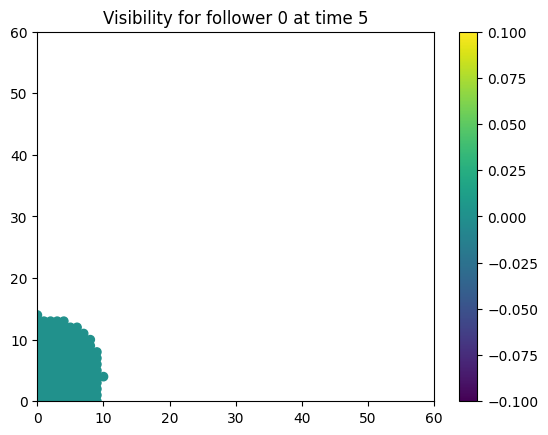

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    24   5  10.000000        10.0         0.0  6.123234e-17        1     6   
164  36  10   5.385165         2.0         5.0  6.630581e-01        1     6   
166  36  12   7.280110         2.0         7.0  4.143599e-01        1     6   
167  36  13   8.246211         2.0         8.0  2.720132e-01        1     6   
168  36  14   9.219544         2.0         9.0  1.222868e-01        1     6   
169  37   0   5.830952         3.0         5.0  6.090582e-01        1     6   
170  37   1   5.000000         3.0         4.0  7.071068e-01        1     6   
171  37   2   4.242641         3.0         3.0  7.860321e-01        1     6   
172  37   3   3.605551         3.0         2.0  8.438604e-01        1     6   
173  37   4   3.162278         3.0         1.0  8.791459e-01        1     6   

     proximity  proximity_standardized  
0            0                     0.0  
164          0                     0.0  

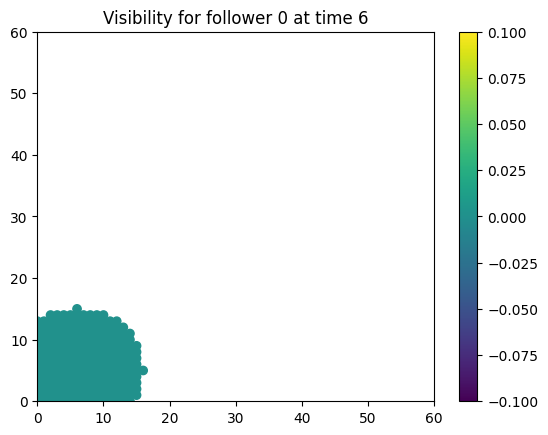

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    27   2  10.000000        10.0         0.0  6.123234e-17        1     7   
142  40   8   6.708204         3.0         6.0  4.943389e-01        1     7   
132  39  10   8.246211         2.0         8.0  2.720132e-01        1     7   
133  39  11   9.219544         2.0         9.0  1.222868e-01        1     7   
134  40   0   3.605551         3.0         2.0  8.438604e-01        1     7   
135  40   1   3.162278         3.0         1.0  8.791459e-01        1     7   
136  40   2   3.000000         3.0         0.0  8.910065e-01        1     7   
137  40   3   3.162278         3.0         1.0  8.791459e-01        1     7   
138  40   4   3.605551         3.0         2.0  8.438604e-01        1     7   
139  40   5   4.242641         3.0         3.0  7.860321e-01        1     7   

     proximity  proximity_standardized  
0            0                     0.0  
142          0                     0.0  

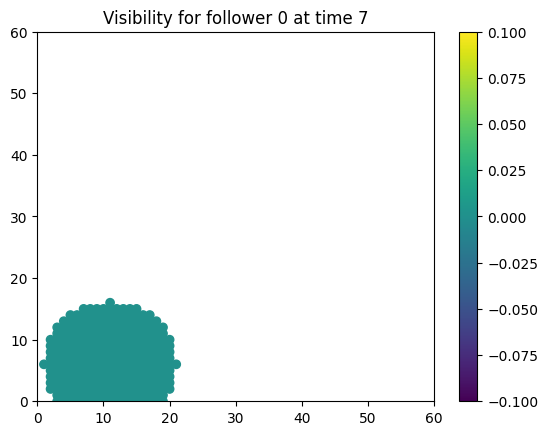

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    17   2  10.000000        10.0         0.0  6.123234e-17        1     8   
142  30   8   6.708204         3.0         6.0  4.943389e-01        1     8   
132  29  10   8.246211         2.0         8.0  2.720132e-01        1     8   
133  29  11   9.219544         2.0         9.0  1.222868e-01        1     8   
134  30   0   3.605551         3.0         2.0  8.438604e-01        1     8   
135  30   1   3.162278         3.0         1.0  8.791459e-01        1     8   
136  30   2   3.000000         3.0         0.0  8.910065e-01        1     8   
137  30   3   3.162278         3.0         1.0  8.791459e-01        1     8   
138  30   4   3.605551         3.0         2.0  8.438604e-01        1     8   
139  30   5   4.242641         3.0         3.0  7.860321e-01        1     8   

     proximity  proximity_standardized  
0            0                     0.0  
142          0                     0.0  

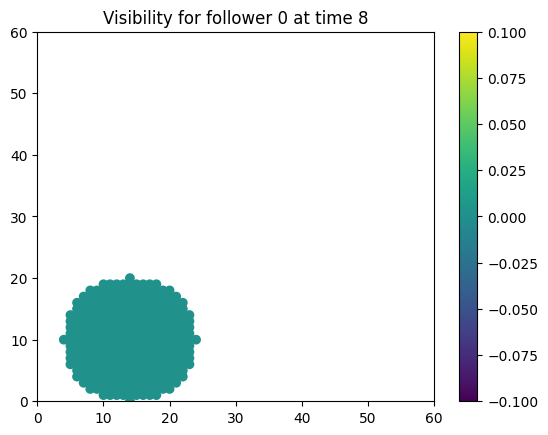

options       x  y   distance  distance_x  distance_y    visibility  forager  time  \
0    20  0  10.000000        10.0         0.0  6.123234e-17        1     9   
116  33  6   6.708204         3.0         6.0  4.943389e-01        1     9   
108  32  8   8.246211         2.0         8.0  2.720132e-01        1     9   
109  32  9   9.219544         2.0         9.0  1.222868e-01        1     9   
110  33  0   3.000000         3.0         0.0  8.910065e-01        1     9   
111  33  1   3.162278         3.0         1.0  8.791459e-01        1     9   
112  33  2   3.605551         3.0         2.0  8.438604e-01        1     9   
113  33  3   4.242641         3.0         3.0  7.860321e-01        1     9   
114  33  4   5.000000         3.0         4.0  7.071068e-01        1     9   
115  33  5   5.830952         3.0         5.0  6.090582e-01        1     9   

     proximity  proximity_standardized  
0            0                     0.0  
116          0                     0.0  
108       

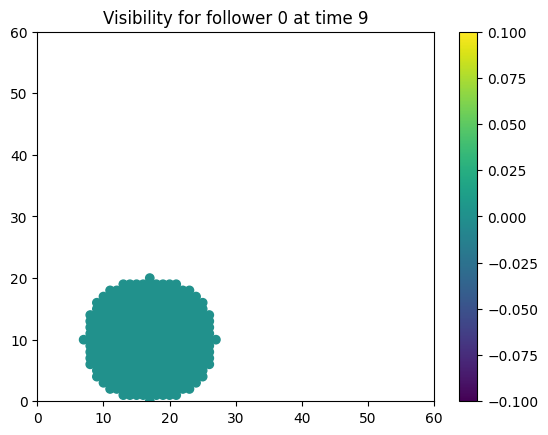

2024-10-28 17:38:49,698 - Generating frame 10/50 


options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    23   6  10.000000        10.0         0.0  6.123234e-17        1    10   
184  36   4   3.605551         3.0         2.0  8.438604e-01        1    10   
190  36  10   5.000000         3.0         4.0  7.071068e-01        1    10   
189  36   9   4.242641         3.0         3.0  7.860321e-01        1    10   
188  36   8   3.605551         3.0         2.0  8.438604e-01        1    10   
187  36   7   3.162278         3.0         1.0  8.791459e-01        1    10   
186  36   6   3.000000         3.0         0.0  8.910065e-01        1    10   
185  36   5   3.162278         3.0         1.0  8.791459e-01        1    10   
183  36   3   4.242641         3.0         3.0  7.860321e-01        1    10   
175  35  11   5.385165         2.0         5.0  6.630581e-01        1    10   

     proximity  proximity_standardized  
0            0                     0.0  
184          0                     0.0  

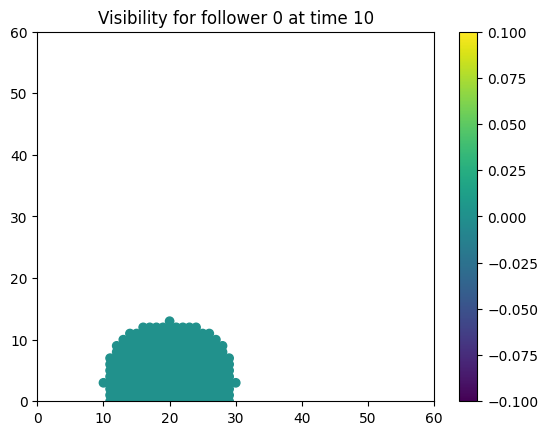

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    26   8  10.000000        10.0         0.0  6.123234e-17        1    11   
202  39   3   5.830952         3.0         5.0  6.090582e-01        1    11   
209  39  10   3.605551         3.0         2.0  8.438604e-01        1    11   
208  39   9   3.162278         3.0         1.0  8.791459e-01        1    11   
207  39   8   3.000000         3.0         0.0  8.910065e-01        1    11   
206  39   7   3.162278         3.0         1.0  8.791459e-01        1    11   
205  39   6   3.605551         3.0         2.0  8.438604e-01        1    11   
204  39   5   4.242641         3.0         3.0  7.860321e-01        1    11   
203  39   4   5.000000         3.0         4.0  7.071068e-01        1    11   
201  39   2   6.708204         3.0         6.0  4.943389e-01        1    11   

     proximity  proximity_standardized  
0            0                     0.0  
202          0                     0.0  

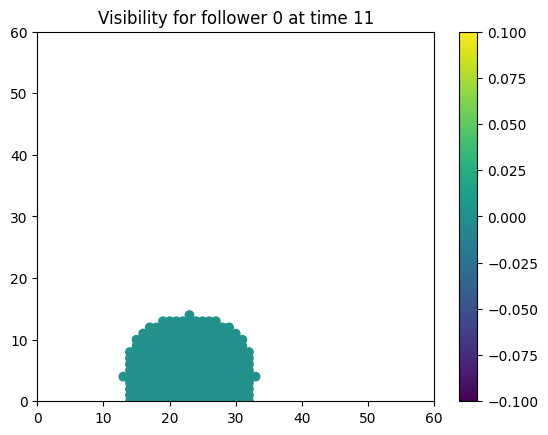

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    29   8  10.000000        10.0         0.0  6.123234e-17        1    12   
202  42   3   5.830952         3.0         5.0  6.090582e-01        1    12   
209  42  10   3.605551         3.0         2.0  8.438604e-01        1    12   
208  42   9   3.162278         3.0         1.0  8.791459e-01        1    12   
207  42   8   3.000000         3.0         0.0  8.910065e-01        1    12   
206  42   7   3.162278         3.0         1.0  8.791459e-01        1    12   
205  42   6   3.605551         3.0         2.0  8.438604e-01        1    12   
204  42   5   4.242641         3.0         3.0  7.860321e-01        1    12   
203  42   4   5.000000         3.0         4.0  7.071068e-01        1    12   
201  42   2   6.708204         3.0         6.0  4.943389e-01        1    12   

     proximity  proximity_standardized  
0            0                     0.0  
202          0                     0.0  

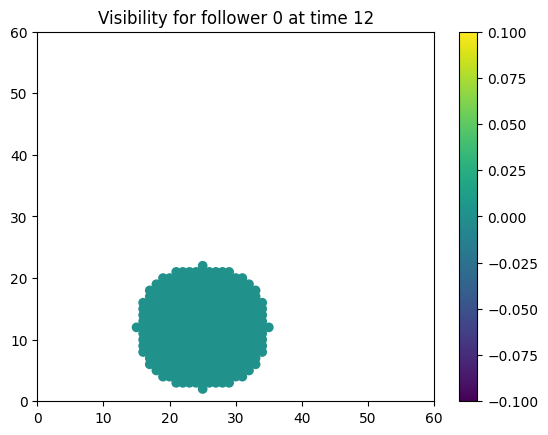

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    32   4  10.000000        10.0         0.0  6.123234e-17        1    13   
154  44  10   6.324555         2.0         6.0  5.457949e-01        1    13   
156  44  12   8.246211         2.0         8.0  2.720132e-01        1    13   
157  44  13   9.219544         2.0         9.0  1.222868e-01        1    13   
158  45   0   5.000000         3.0         4.0  7.071068e-01        1    13   
159  45   1   4.242641         3.0         3.0  7.860321e-01        1    13   
160  45   2   3.605551         3.0         2.0  8.438604e-01        1    13   
161  45   3   3.162278         3.0         1.0  8.791459e-01        1    13   
162  45   4   3.000000         3.0         0.0  8.910065e-01        1    13   
163  45   5   3.162278         3.0         1.0  8.791459e-01        1    13   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  

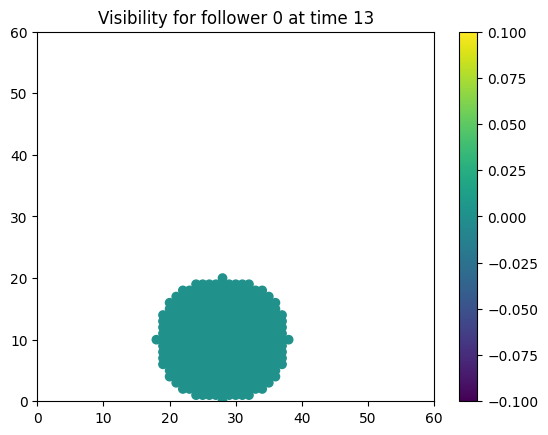

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    35   5  10.000000        10.0         0.0  6.123234e-17        1    14   
164  47  10   5.385165         2.0         5.0  6.630581e-01        1    14   
166  47  12   7.280110         2.0         7.0  4.143599e-01        1    14   
167  47  13   8.246211         2.0         8.0  2.720132e-01        1    14   
168  47  14   9.219544         2.0         9.0  1.222868e-01        1    14   
169  48   0   5.830952         3.0         5.0  6.090582e-01        1    14   
170  48   1   5.000000         3.0         4.0  7.071068e-01        1    14   
171  48   2   4.242641         3.0         3.0  7.860321e-01        1    14   
172  48   3   3.605551         3.0         2.0  8.438604e-01        1    14   
173  48   4   3.162278         3.0         1.0  8.791459e-01        1    14   

     proximity  proximity_standardized  
0            0                     0.0  
164          0                     0.0  

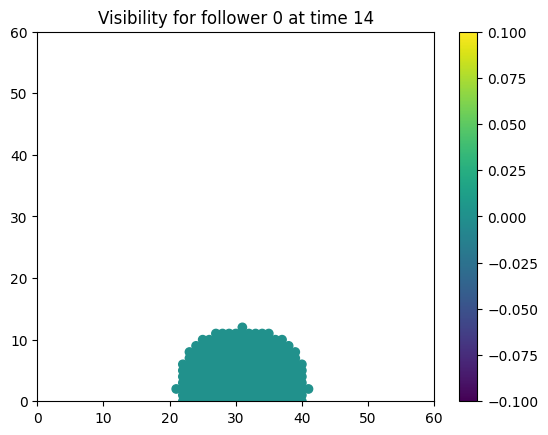

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    37  10  10.000000        10.0         0.0  6.123234e-17        1    15   
209  50   3   7.615773         3.0         7.0  3.658198e-01        1    15   
216  50  10   3.000000         3.0         0.0  8.910065e-01        1    15   
215  50   9   3.162278         3.0         1.0  8.791459e-01        1    15   
214  50   8   3.605551         3.0         2.0  8.438604e-01        1    15   
213  50   7   4.242641         3.0         3.0  7.860321e-01        1    15   
212  50   6   5.000000         3.0         4.0  7.071068e-01        1    15   
211  50   5   5.830952         3.0         5.0  6.090582e-01        1    15   
210  50   4   6.708204         3.0         6.0  4.943389e-01        1    15   
208  50   2   8.544004         3.0         8.0  2.267187e-01        1    15   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

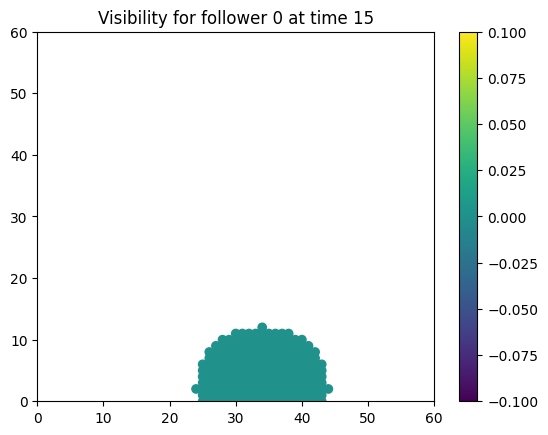

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    40   4  10.000000        10.0         0.0  6.123234e-17        1    16   
153  52   9   5.385165         2.0         5.0  6.630581e-01        1    16   
155  52  11   7.280110         2.0         7.0  4.143599e-01        1    16   
156  52  12   8.246211         2.0         8.0  2.720132e-01        1    16   
157  52  13   9.219544         2.0         9.0  1.222868e-01        1    16   
158  53   0   5.000000         3.0         4.0  7.071068e-01        1    16   
159  53   1   4.242641         3.0         3.0  7.860321e-01        1    16   
160  53   2   3.605551         3.0         2.0  8.438604e-01        1    16   
161  53   3   3.162278         3.0         1.0  8.791459e-01        1    16   
162  53   4   3.000000         3.0         0.0  8.910065e-01        1    16   

     proximity  proximity_standardized  
0            0                     0.0  
153          0                     0.0  

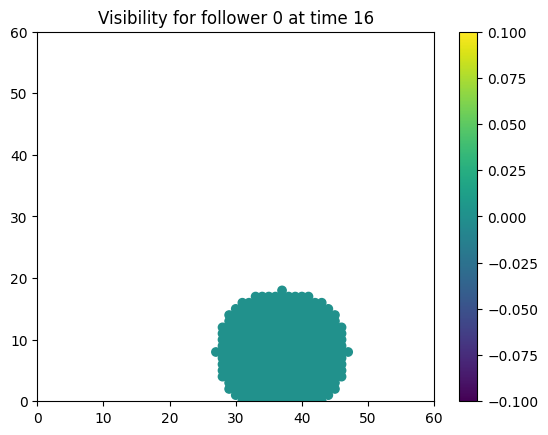

options       x  y   distance  distance_x  distance_y    visibility  forager  time  \
0    43  0  10.000000        10.0         0.0  6.123234e-17        1    17   
93   54  3   3.162278         1.0         3.0  8.791459e-01        1    17   
95   54  5   5.099020         1.0         5.0  6.960234e-01        1    17   
96   54  6   6.082763         1.0         6.0  5.772184e-01        1    17   
97   54  7   7.071068         1.0         7.0  4.440158e-01        1    17   
98   54  8   8.062258         1.0         8.0  2.997016e-01        1    17   
99   54  9   9.055385         1.0         9.0  1.478359e-01        1    17   
100  55  0   2.000000         2.0         0.0  9.510565e-01        1    17   
101  55  1   2.236068         2.0         1.0  9.389465e-01        1    17   
102  55  2   2.828427         2.0         2.0  9.029168e-01        1    17   

     proximity  proximity_standardized  
0            0                     0.0  
93           0                     0.0  
95        

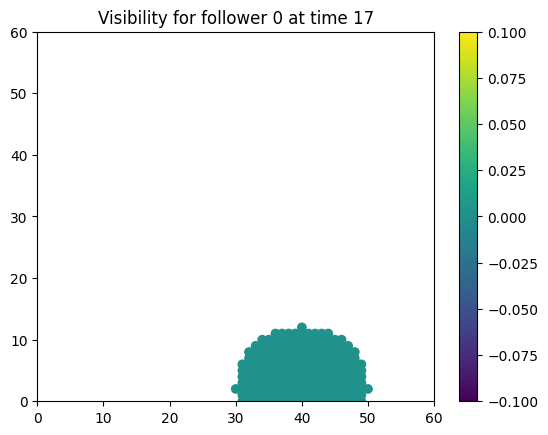

options      x   y   distance  distance_x  distance_y    visibility  forager  time  \
0   45   0  10.000000        10.0         0.0  6.123234e-17        1    18   
97  56   7   7.071068         1.0         7.0  4.440158e-01        1    18   
95  56   5   5.099020         1.0         5.0  6.960234e-01        1    18   
94  56   4   4.123106         1.0         4.0  7.975002e-01        1    18   
93  56   3   3.162278         1.0         3.0  8.791459e-01        1    18   
92  56   2   2.236068         1.0         2.0  9.389465e-01        1    18   
91  56   1   1.414214         1.0         1.0  9.754273e-01        1    18   
90  56   0   1.000000         1.0         0.0  9.876883e-01        1    18   
89  55  10  10.000000         0.0        10.0  6.123234e-17        1    18   
88  55   9   9.000000         0.0         9.0  1.564345e-01        1    18   

    proximity  proximity_standardized  
0           0                     0.0  
97          0                     0.0  
95          0

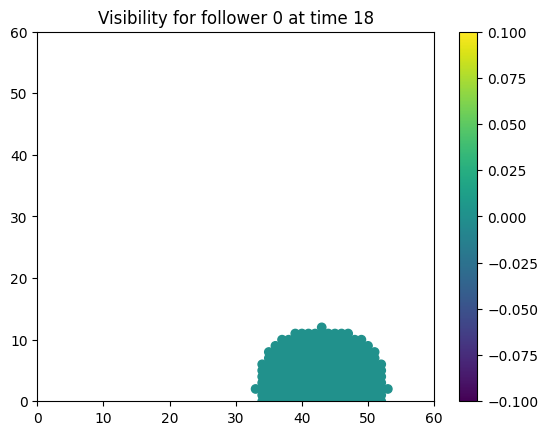

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45   9      10.0        10.0         0.0  6.123234e-17        1    19   
153  55   5       4.0         0.0         4.0  8.090170e-01        1    19   
155  55   7       2.0         0.0         2.0  9.510565e-01        1    19   
156  55   8       1.0         0.0         1.0  9.876883e-01        1    19   
157  55   9       0.0         0.0         0.0  1.000000e+00        1    19   
158  55  10       1.0         0.0         1.0  9.876883e-01        1    19   
159  55  11       2.0         0.0         2.0  9.510565e-01        1    19   
160  55  12       3.0         0.0         3.0  8.910065e-01        1    19   
161  55  13       4.0         0.0         4.0  8.090170e-01        1    19   
162  55  14       5.0         0.0         5.0  7.071068e-01        1    19   

     proximity  proximity_standardized  
0            0                     0.0  
153          0                     0.0  
155       

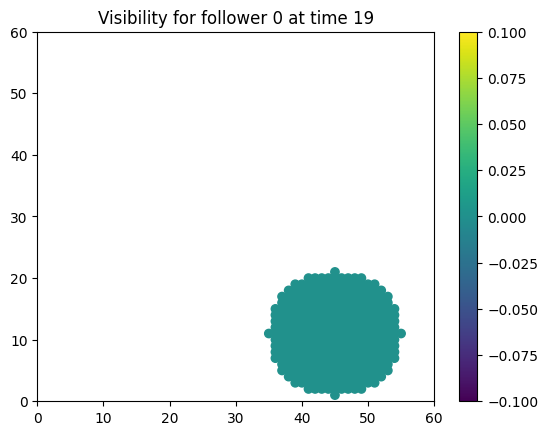

2024-10-28 17:38:52,043 - Generating frame 20/50 


options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  12      10.0        10.0         0.0  6.123234e-17        1    20   
154  55   8       4.0         0.0         4.0  8.090170e-01        1    20   
156  55  10       2.0         0.0         2.0  9.510565e-01        1    20   
157  55  11       1.0         0.0         1.0  9.876883e-01        1    20   
158  55  12       0.0         0.0         0.0  1.000000e+00        1    20   
159  55  13       1.0         0.0         1.0  9.876883e-01        1    20   
160  55  14       2.0         0.0         2.0  9.510565e-01        1    20   
161  55  15       3.0         0.0         3.0  8.910065e-01        1    20   
162  55  16       4.0         0.0         4.0  8.090170e-01        1    20   
163  55  17       5.0         0.0         5.0  7.071068e-01        1    20   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

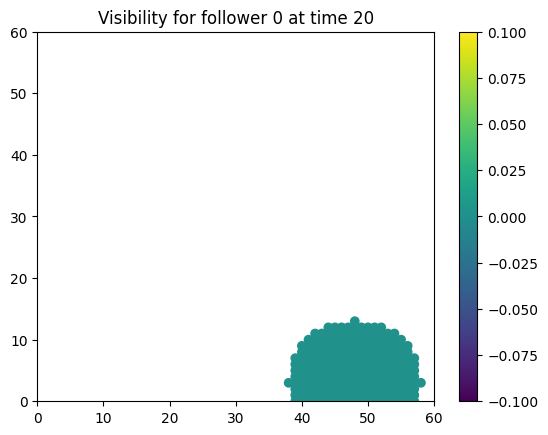

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  15      10.0        10.0         0.0  6.123234e-17        1    21   
154  55  11       4.0         0.0         4.0  8.090170e-01        1    21   
156  55  13       2.0         0.0         2.0  9.510565e-01        1    21   
157  55  14       1.0         0.0         1.0  9.876883e-01        1    21   
158  55  15       0.0         0.0         0.0  1.000000e+00        1    21   
159  55  16       1.0         0.0         1.0  9.876883e-01        1    21   
160  55  17       2.0         0.0         2.0  9.510565e-01        1    21   
161  55  18       3.0         0.0         3.0  8.910065e-01        1    21   
162  55  19       4.0         0.0         4.0  8.090170e-01        1    21   
163  55  20       5.0         0.0         5.0  7.071068e-01        1    21   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

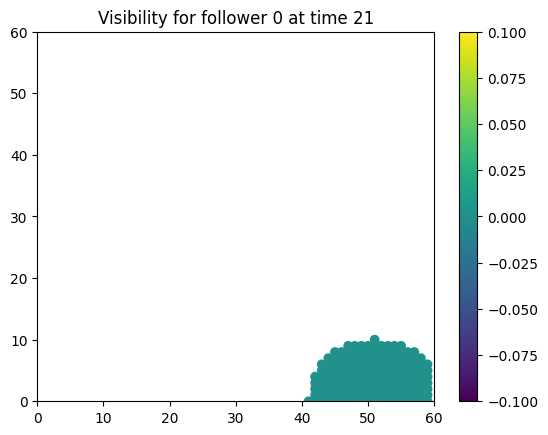

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  16      10.0        10.0         0.0  6.123234e-17        1    22   
154  55  12       4.0         0.0         4.0  8.090170e-01        1    22   
156  55  14       2.0         0.0         2.0  9.510565e-01        1    22   
157  55  15       1.0         0.0         1.0  9.876883e-01        1    22   
158  55  16       0.0         0.0         0.0  1.000000e+00        1    22   
159  55  17       1.0         0.0         1.0  9.876883e-01        1    22   
160  55  18       2.0         0.0         2.0  9.510565e-01        1    22   
161  55  19       3.0         0.0         3.0  8.910065e-01        1    22   
162  55  20       4.0         0.0         4.0  8.090170e-01        1    22   
163  55  21       5.0         0.0         5.0  7.071068e-01        1    22   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

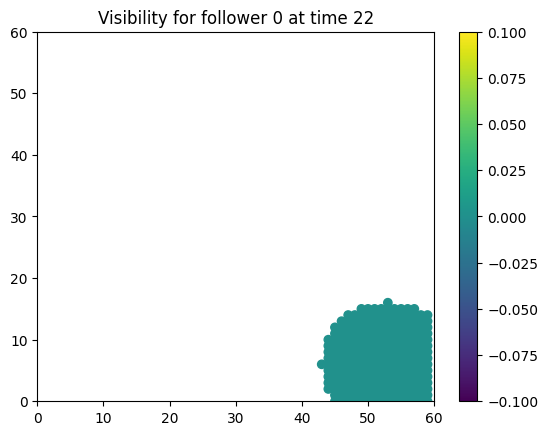

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    35  16  10.000000        10.0         0.0  6.123234e-17        1    23   
209  48   9   7.615773         3.0         7.0  3.658198e-01        1    23   
216  48  16   3.000000         3.0         0.0  8.910065e-01        1    23   
215  48  15   3.162278         3.0         1.0  8.791459e-01        1    23   
214  48  14   3.605551         3.0         2.0  8.438604e-01        1    23   
213  48  13   4.242641         3.0         3.0  7.860321e-01        1    23   
212  48  12   5.000000         3.0         4.0  7.071068e-01        1    23   
211  48  11   5.830952         3.0         5.0  6.090582e-01        1    23   
210  48  10   6.708204         3.0         6.0  4.943389e-01        1    23   
208  48   8   8.544004         3.0         8.0  2.267187e-01        1    23   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

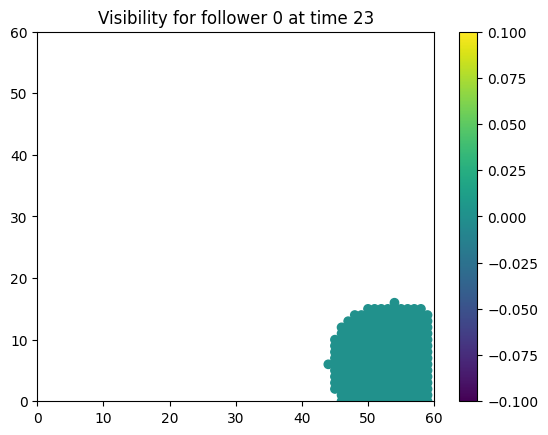

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    38  13  10.000000        10.0         0.0  6.123234e-17        1    24   
209  51   6   7.615773         3.0         7.0  3.658198e-01        1    24   
216  51  13   3.000000         3.0         0.0  8.910065e-01        1    24   
215  51  12   3.162278         3.0         1.0  8.791459e-01        1    24   
214  51  11   3.605551         3.0         2.0  8.438604e-01        1    24   
213  51  10   4.242641         3.0         3.0  7.860321e-01        1    24   
212  51   9   5.000000         3.0         4.0  7.071068e-01        1    24   
211  51   8   5.830952         3.0         5.0  6.090582e-01        1    24   
210  51   7   6.708204         3.0         6.0  4.943389e-01        1    24   
208  51   5   8.544004         3.0         8.0  2.267187e-01        1    24   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

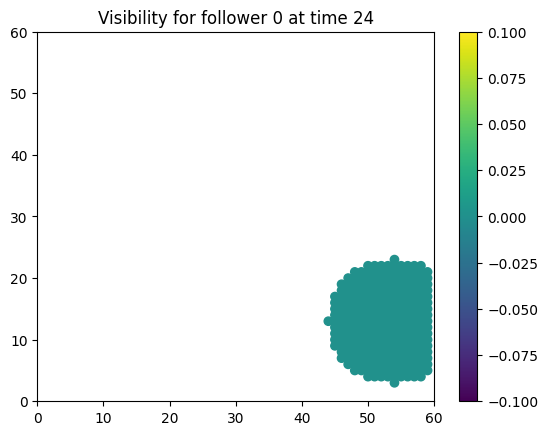

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    41   8  10.000000        10.0         0.0  6.123234e-17        1    25   
204  54   5   4.242641         3.0         3.0  7.860321e-01        1    25   
202  54   3   5.830952         3.0         5.0  6.090582e-01        1    25   
201  54   2   6.708204         3.0         6.0  4.943389e-01        1    25   
200  54   1   7.615773         3.0         7.0  3.658198e-01        1    25   
199  54   0   8.544004         3.0         8.0  2.267187e-01        1    25   
198  53  17   9.219544         2.0         9.0  1.222868e-01        1    25   
197  53  16   8.246211         2.0         8.0  2.720132e-01        1    25   
196  53  15   7.280110         2.0         7.0  4.143599e-01        1    25   
195  53  14   6.324555         2.0         6.0  5.457949e-01        1    25   

     proximity  proximity_standardized  
0            0                     0.0  
204          0                     0.0  

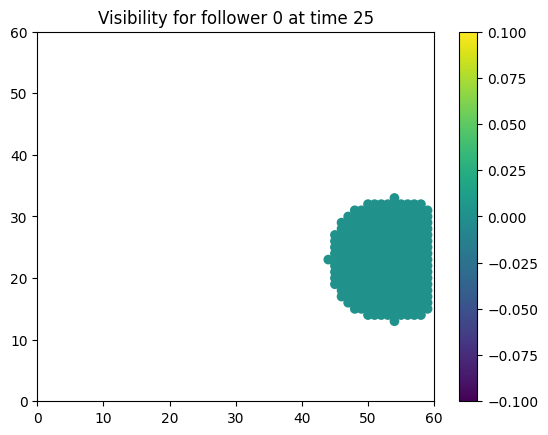

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    44   1  10.000000        10.0         0.0  6.123234e-17        1    26   
105  55   5   4.123106         1.0         4.0  7.975002e-01        1    26   
98   54  10   9.000000         0.0         9.0  1.564345e-01        1    26   
99   54  11  10.000000         0.0        10.0  6.123234e-17        1    26   
100  55   0   1.414214         1.0         1.0  9.754273e-01        1    26   
101  55   1   1.000000         1.0         0.0  9.876883e-01        1    26   
102  55   2   1.414214         1.0         1.0  9.754273e-01        1    26   
103  55   3   2.236068         1.0         2.0  9.389465e-01        1    26   
104  55   4   3.162278         1.0         3.0  8.791459e-01        1    26   
106  55   6   5.099020         1.0         5.0  6.960234e-01        1    26   

     proximity  proximity_standardized  
0            0                     0.0  
105          0                     0.0  

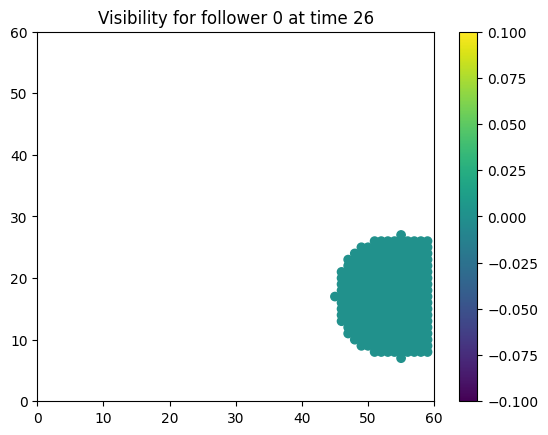

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    44  11  10.000000        10.0         0.0  6.123234e-17        1    27   
164  54  17   6.000000         0.0         6.0  5.877853e-01        1    27   
166  54  19   8.000000         0.0         8.0  3.090170e-01        1    27   
167  54  20   9.000000         0.0         9.0  1.564345e-01        1    27   
168  54  21  10.000000         0.0        10.0  6.123234e-17        1    27   
169  55   2   9.055385         1.0         9.0  1.478359e-01        1    27   
170  55   3   8.062258         1.0         8.0  2.997016e-01        1    27   
171  55   4   7.071068         1.0         7.0  4.440158e-01        1    27   
172  55   5   6.082763         1.0         6.0  5.772184e-01        1    27   
173  55   6   5.099020         1.0         5.0  6.960234e-01        1    27   

     proximity  proximity_standardized  
0            0                     0.0  
164          0                     0.0  

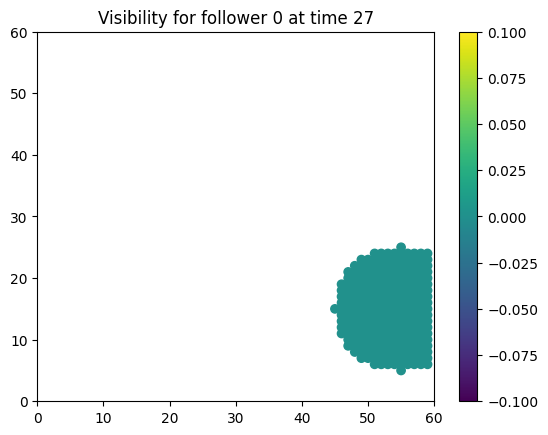

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45   4      10.0        10.0         0.0  6.123234e-17        1    28   
127  55  12       8.0         0.0         8.0  3.090170e-01        1    28   
118  55   3       1.0         0.0         1.0  9.876883e-01        1    28   
119  55   4       0.0         0.0         0.0  1.000000e+00        1    28   
120  55   5       1.0         0.0         1.0  9.876883e-01        1    28   
121  55   6       2.0         0.0         2.0  9.510565e-01        1    28   
122  55   7       3.0         0.0         3.0  8.910065e-01        1    28   
123  55   8       4.0         0.0         4.0  8.090170e-01        1    28   
124  55   9       5.0         0.0         5.0  7.071068e-01        1    28   
125  55  10       6.0         0.0         6.0  5.877853e-01        1    28   

     proximity  proximity_standardized  
0            0                     0.0  
127          0                     0.0  
118       

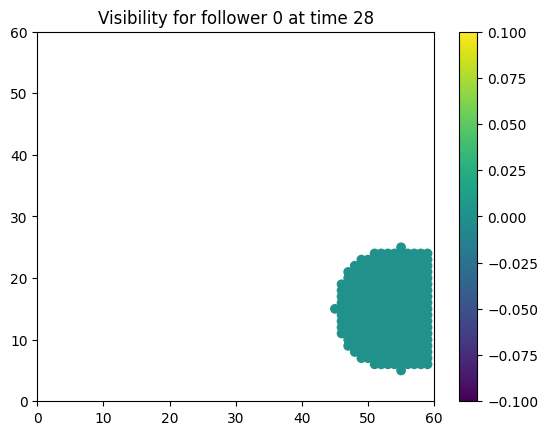

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45   8      10.0        10.0         0.0  6.123234e-17        1    29   
161  55  17       9.0         0.0         9.0  1.564345e-01        1    29   
149  55   5       3.0         0.0         3.0  8.910065e-01        1    29   
150  55   6       2.0         0.0         2.0  9.510565e-01        1    29   
151  55   7       1.0         0.0         1.0  9.876883e-01        1    29   
152  55   8       0.0         0.0         0.0  1.000000e+00        1    29   
153  55   9       1.0         0.0         1.0  9.876883e-01        1    29   
154  55  10       2.0         0.0         2.0  9.510565e-01        1    29   
155  55  11       3.0         0.0         3.0  8.910065e-01        1    29   
156  55  12       4.0         0.0         4.0  8.090170e-01        1    29   

     proximity  proximity_standardized  
0            0                     0.0  
161          0                     0.0  
149       

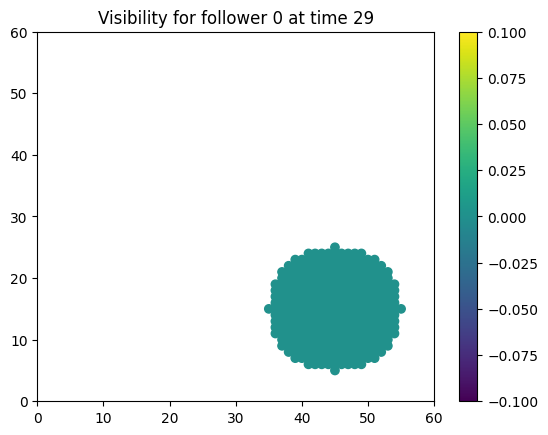

2024-10-28 17:38:54,365 - Generating frame 30/50 


options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  12      10.0        10.0         0.0  6.123234e-17        1    30   
154  55   8       4.0         0.0         4.0  8.090170e-01        1    30   
156  55  10       2.0         0.0         2.0  9.510565e-01        1    30   
157  55  11       1.0         0.0         1.0  9.876883e-01        1    30   
158  55  12       0.0         0.0         0.0  1.000000e+00        1    30   
159  55  13       1.0         0.0         1.0  9.876883e-01        1    30   
160  55  14       2.0         0.0         2.0  9.510565e-01        1    30   
161  55  15       3.0         0.0         3.0  8.910065e-01        1    30   
162  55  16       4.0         0.0         4.0  8.090170e-01        1    30   
163  55  17       5.0         0.0         5.0  7.071068e-01        1    30   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

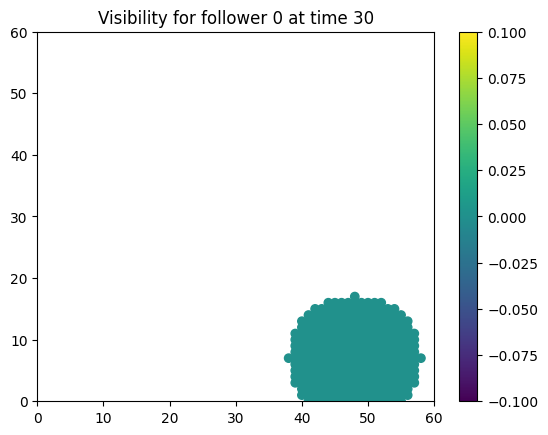

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  14      10.0        10.0         0.0  6.123234e-17        1    31   
154  55  10       4.0         0.0         4.0  8.090170e-01        1    31   
156  55  12       2.0         0.0         2.0  9.510565e-01        1    31   
157  55  13       1.0         0.0         1.0  9.876883e-01        1    31   
158  55  14       0.0         0.0         0.0  1.000000e+00        1    31   
159  55  15       1.0         0.0         1.0  9.876883e-01        1    31   
160  55  16       2.0         0.0         2.0  9.510565e-01        1    31   
161  55  17       3.0         0.0         3.0  8.910065e-01        1    31   
162  55  18       4.0         0.0         4.0  8.090170e-01        1    31   
163  55  19       5.0         0.0         5.0  7.071068e-01        1    31   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

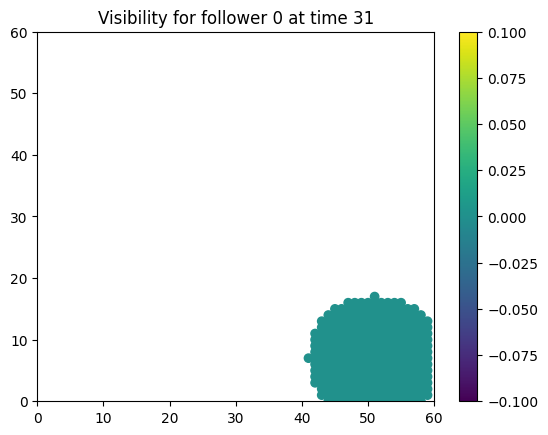

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  10      10.0        10.0         0.0  6.123234e-17        1    32   
154  55   6       4.0         0.0         4.0  8.090170e-01        1    32   
156  55   8       2.0         0.0         2.0  9.510565e-01        1    32   
157  55   9       1.0         0.0         1.0  9.876883e-01        1    32   
158  55  10       0.0         0.0         0.0  1.000000e+00        1    32   
159  55  11       1.0         0.0         1.0  9.876883e-01        1    32   
160  55  12       2.0         0.0         2.0  9.510565e-01        1    32   
161  55  13       3.0         0.0         3.0  8.910065e-01        1    32   
162  55  14       4.0         0.0         4.0  8.090170e-01        1    32   
163  55  15       5.0         0.0         5.0  7.071068e-01        1    32   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

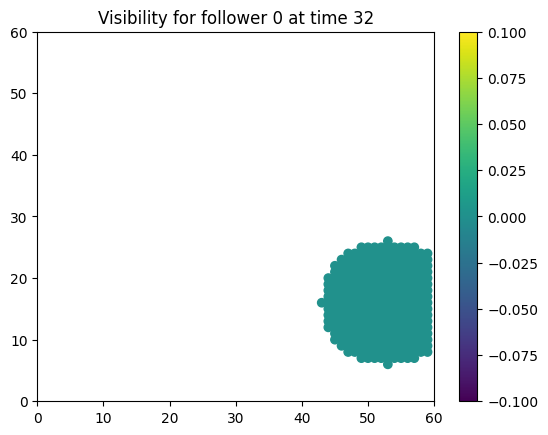

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  10      10.0        10.0         0.0  6.123234e-17        1    33   
154  55   6       4.0         0.0         4.0  8.090170e-01        1    33   
156  55   8       2.0         0.0         2.0  9.510565e-01        1    33   
157  55   9       1.0         0.0         1.0  9.876883e-01        1    33   
158  55  10       0.0         0.0         0.0  1.000000e+00        1    33   
159  55  11       1.0         0.0         1.0  9.876883e-01        1    33   
160  55  12       2.0         0.0         2.0  9.510565e-01        1    33   
161  55  13       3.0         0.0         3.0  8.910065e-01        1    33   
162  55  14       4.0         0.0         4.0  8.090170e-01        1    33   
163  55  15       5.0         0.0         5.0  7.071068e-01        1    33   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

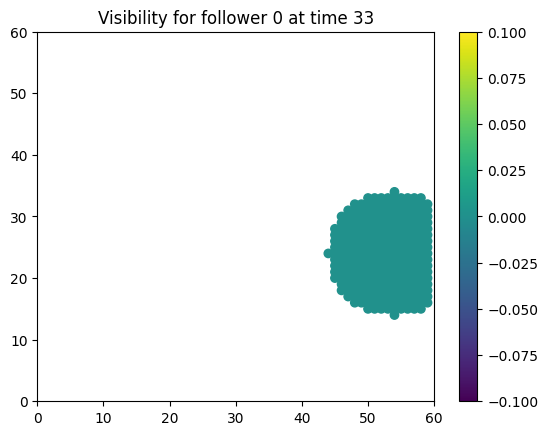

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  13      10.0        10.0         0.0  6.123234e-17        1    34   
154  55   9       4.0         0.0         4.0  8.090170e-01        1    34   
156  55  11       2.0         0.0         2.0  9.510565e-01        1    34   
157  55  12       1.0         0.0         1.0  9.876883e-01        1    34   
158  55  13       0.0         0.0         0.0  1.000000e+00        1    34   
159  55  14       1.0         0.0         1.0  9.876883e-01        1    34   
160  55  15       2.0         0.0         2.0  9.510565e-01        1    34   
161  55  16       3.0         0.0         3.0  8.910065e-01        1    34   
162  55  17       4.0         0.0         4.0  8.090170e-01        1    34   
163  55  18       5.0         0.0         5.0  7.071068e-01        1    34   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

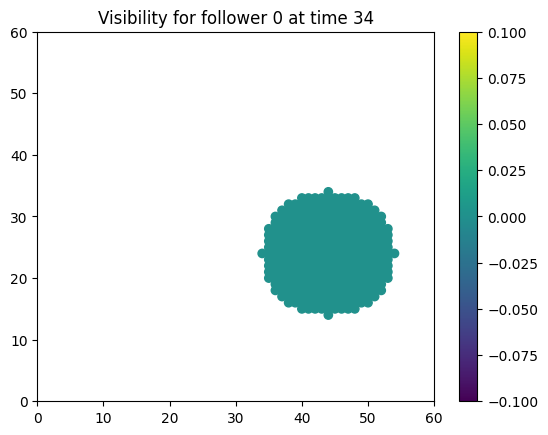

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  16      10.0        10.0         0.0  6.123234e-17        1    35   
154  55  12       4.0         0.0         4.0  8.090170e-01        1    35   
156  55  14       2.0         0.0         2.0  9.510565e-01        1    35   
157  55  15       1.0         0.0         1.0  9.876883e-01        1    35   
158  55  16       0.0         0.0         0.0  1.000000e+00        1    35   
159  55  17       1.0         0.0         1.0  9.876883e-01        1    35   
160  55  18       2.0         0.0         2.0  9.510565e-01        1    35   
161  55  19       3.0         0.0         3.0  8.910065e-01        1    35   
162  55  20       4.0         0.0         4.0  8.090170e-01        1    35   
163  55  21       5.0         0.0         5.0  7.071068e-01        1    35   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

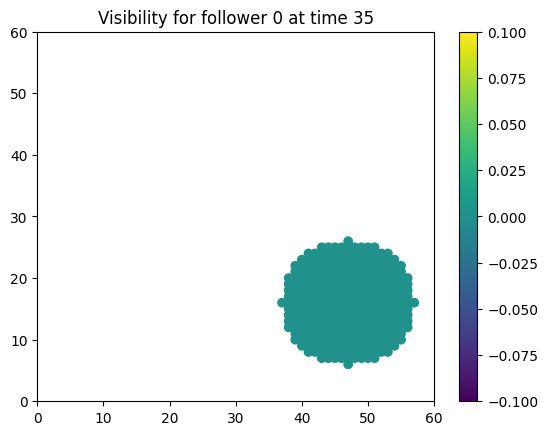

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  21      10.0        10.0         0.0  6.123234e-17        1    36   
154  55  17       4.0         0.0         4.0  8.090170e-01        1    36   
156  55  19       2.0         0.0         2.0  9.510565e-01        1    36   
157  55  20       1.0         0.0         1.0  9.876883e-01        1    36   
158  55  21       0.0         0.0         0.0  1.000000e+00        1    36   
159  55  22       1.0         0.0         1.0  9.876883e-01        1    36   
160  55  23       2.0         0.0         2.0  9.510565e-01        1    36   
161  55  24       3.0         0.0         3.0  8.910065e-01        1    36   
162  55  25       4.0         0.0         4.0  8.090170e-01        1    36   
163  55  26       5.0         0.0         5.0  7.071068e-01        1    36   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

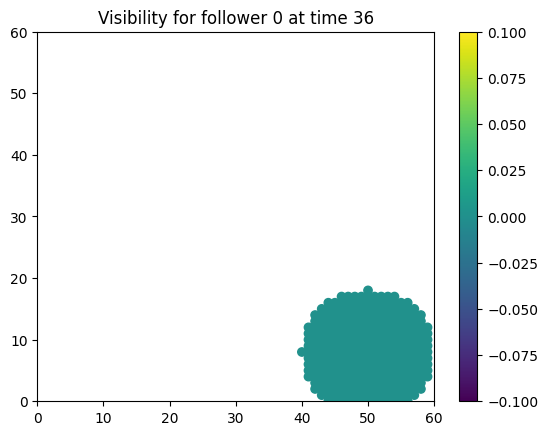

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  24      10.0        10.0         0.0  6.123234e-17        1    37   
154  55  20       4.0         0.0         4.0  8.090170e-01        1    37   
156  55  22       2.0         0.0         2.0  9.510565e-01        1    37   
157  55  23       1.0         0.0         1.0  9.876883e-01        1    37   
158  55  24       0.0         0.0         0.0  1.000000e+00        1    37   
159  55  25       1.0         0.0         1.0  9.876883e-01        1    37   
160  55  26       2.0         0.0         2.0  9.510565e-01        1    37   
161  55  27       3.0         0.0         3.0  8.910065e-01        1    37   
162  55  28       4.0         0.0         4.0  8.090170e-01        1    37   
163  55  29       5.0         0.0         5.0  7.071068e-01        1    37   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

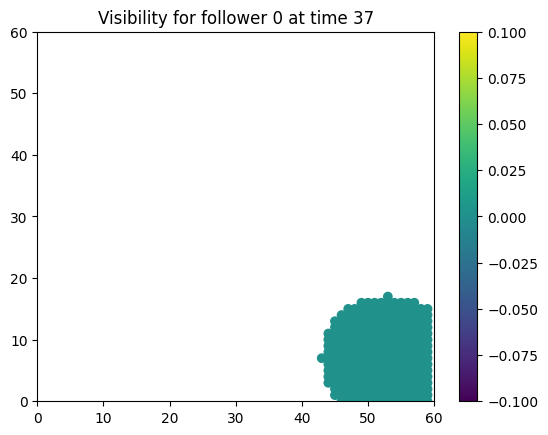

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  20      10.0        10.0         0.0  6.123234e-17        1    38   
154  55  16       4.0         0.0         4.0  8.090170e-01        1    38   
156  55  18       2.0         0.0         2.0  9.510565e-01        1    38   
157  55  19       1.0         0.0         1.0  9.876883e-01        1    38   
158  55  20       0.0         0.0         0.0  1.000000e+00        1    38   
159  55  21       1.0         0.0         1.0  9.876883e-01        1    38   
160  55  22       2.0         0.0         2.0  9.510565e-01        1    38   
161  55  23       3.0         0.0         3.0  8.910065e-01        1    38   
162  55  24       4.0         0.0         4.0  8.090170e-01        1    38   
163  55  25       5.0         0.0         5.0  7.071068e-01        1    38   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

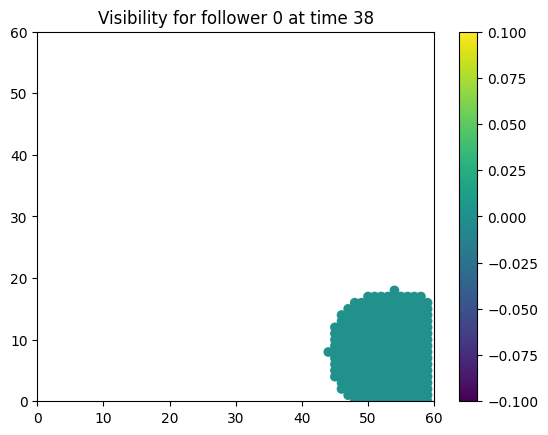

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  25      10.0        10.0         0.0  6.123234e-17        1    39   
154  55  21       4.0         0.0         4.0  8.090170e-01        1    39   
156  55  23       2.0         0.0         2.0  9.510565e-01        1    39   
157  55  24       1.0         0.0         1.0  9.876883e-01        1    39   
158  55  25       0.0         0.0         0.0  1.000000e+00        1    39   
159  55  26       1.0         0.0         1.0  9.876883e-01        1    39   
160  55  27       2.0         0.0         2.0  9.510565e-01        1    39   
161  55  28       3.0         0.0         3.0  8.910065e-01        1    39   
162  55  29       4.0         0.0         4.0  8.090170e-01        1    39   
163  55  30       5.0         0.0         5.0  7.071068e-01        1    39   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

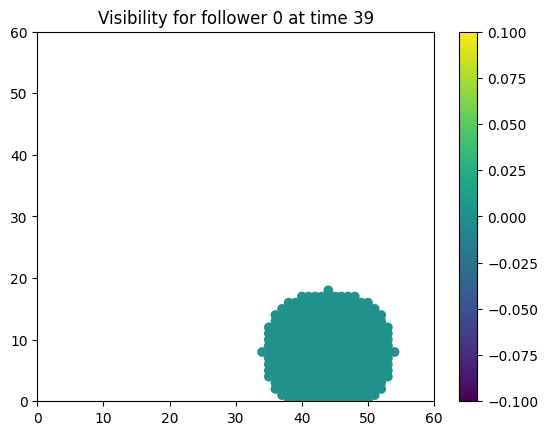

2024-10-28 17:38:56,968 - Generating frame 40/50 


options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  25      10.0        10.0         0.0  6.123234e-17        1    40   
154  55  21       4.0         0.0         4.0  8.090170e-01        1    40   
156  55  23       2.0         0.0         2.0  9.510565e-01        1    40   
157  55  24       1.0         0.0         1.0  9.876883e-01        1    40   
158  55  25       0.0         0.0         0.0  1.000000e+00        1    40   
159  55  26       1.0         0.0         1.0  9.876883e-01        1    40   
160  55  27       2.0         0.0         2.0  9.510565e-01        1    40   
161  55  28       3.0         0.0         3.0  8.910065e-01        1    40   
162  55  29       4.0         0.0         4.0  8.090170e-01        1    40   
163  55  30       5.0         0.0         5.0  7.071068e-01        1    40   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

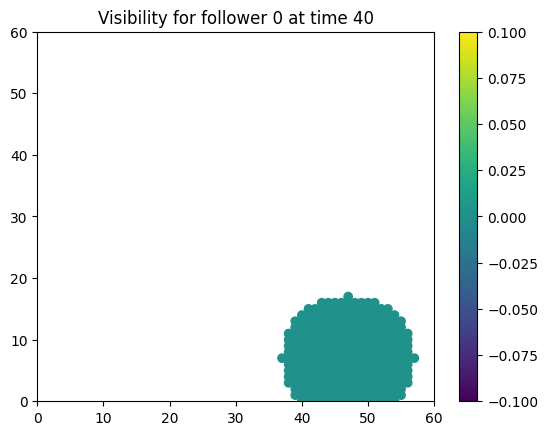

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  28      10.0        10.0         0.0  6.123234e-17        1    41   
154  55  24       4.0         0.0         4.0  8.090170e-01        1    41   
156  55  26       2.0         0.0         2.0  9.510565e-01        1    41   
157  55  27       1.0         0.0         1.0  9.876883e-01        1    41   
158  55  28       0.0         0.0         0.0  1.000000e+00        1    41   
159  55  29       1.0         0.0         1.0  9.876883e-01        1    41   
160  55  30       2.0         0.0         2.0  9.510565e-01        1    41   
161  55  31       3.0         0.0         3.0  8.910065e-01        1    41   
162  55  32       4.0         0.0         4.0  8.090170e-01        1    41   
163  55  33       5.0         0.0         5.0  7.071068e-01        1    41   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

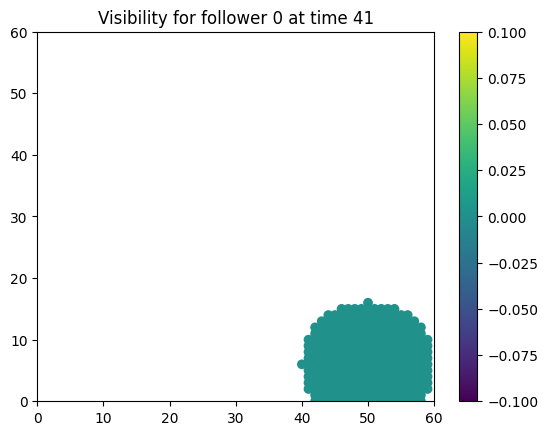

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  31      10.0        10.0         0.0  6.123234e-17        1    42   
154  55  27       4.0         0.0         4.0  8.090170e-01        1    42   
156  55  29       2.0         0.0         2.0  9.510565e-01        1    42   
157  55  30       1.0         0.0         1.0  9.876883e-01        1    42   
158  55  31       0.0         0.0         0.0  1.000000e+00        1    42   
159  55  32       1.0         0.0         1.0  9.876883e-01        1    42   
160  55  33       2.0         0.0         2.0  9.510565e-01        1    42   
161  55  34       3.0         0.0         3.0  8.910065e-01        1    42   
162  55  35       4.0         0.0         4.0  8.090170e-01        1    42   
163  55  36       5.0         0.0         5.0  7.071068e-01        1    42   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

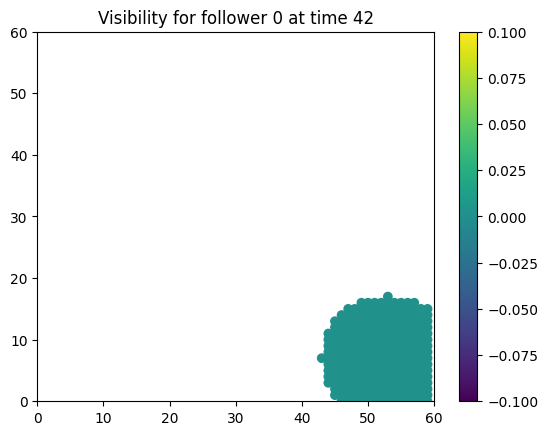

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  27      10.0        10.0         0.0  6.123234e-17        1    43   
154  55  23       4.0         0.0         4.0  8.090170e-01        1    43   
156  55  25       2.0         0.0         2.0  9.510565e-01        1    43   
157  55  26       1.0         0.0         1.0  9.876883e-01        1    43   
158  55  27       0.0         0.0         0.0  1.000000e+00        1    43   
159  55  28       1.0         0.0         1.0  9.876883e-01        1    43   
160  55  29       2.0         0.0         2.0  9.510565e-01        1    43   
161  55  30       3.0         0.0         3.0  8.910065e-01        1    43   
162  55  31       4.0         0.0         4.0  8.090170e-01        1    43   
163  55  32       5.0         0.0         5.0  7.071068e-01        1    43   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

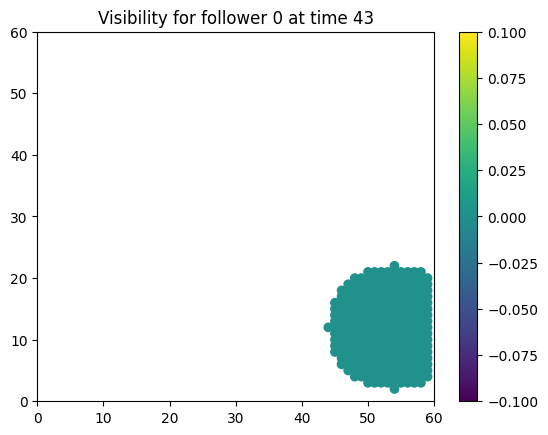

options       x   y  distance  distance_x  distance_y    visibility  forager  time  \
0    45  32      10.0        10.0         0.0  6.123234e-17        1    44   
154  55  28       4.0         0.0         4.0  8.090170e-01        1    44   
156  55  30       2.0         0.0         2.0  9.510565e-01        1    44   
157  55  31       1.0         0.0         1.0  9.876883e-01        1    44   
158  55  32       0.0         0.0         0.0  1.000000e+00        1    44   
159  55  33       1.0         0.0         1.0  9.876883e-01        1    44   
160  55  34       2.0         0.0         2.0  9.510565e-01        1    44   
161  55  35       3.0         0.0         3.0  8.910065e-01        1    44   
162  55  36       4.0         0.0         4.0  8.090170e-01        1    44   
163  55  37       5.0         0.0         5.0  7.071068e-01        1    44   

     proximity  proximity_standardized  
0            0                     0.0  
154          0                     0.0  
156       

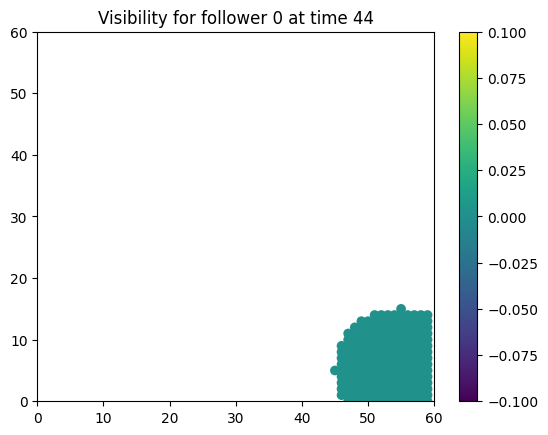

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    35  32  10.000000        10.0         0.0  6.123234e-17        1    45   
209  48  25   7.615773         3.0         7.0  3.658198e-01        1    45   
216  48  32   3.000000         3.0         0.0  8.910065e-01        1    45   
215  48  31   3.162278         3.0         1.0  8.791459e-01        1    45   
214  48  30   3.605551         3.0         2.0  8.438604e-01        1    45   
213  48  29   4.242641         3.0         3.0  7.860321e-01        1    45   
212  48  28   5.000000         3.0         4.0  7.071068e-01        1    45   
211  48  27   5.830952         3.0         5.0  6.090582e-01        1    45   
210  48  26   6.708204         3.0         6.0  4.943389e-01        1    45   
208  48  24   8.544004         3.0         8.0  2.267187e-01        1    45   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

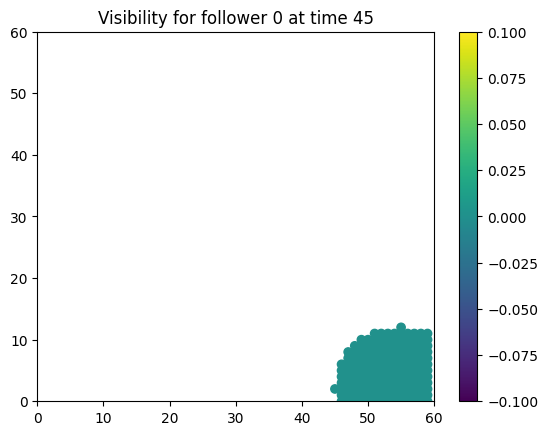

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    38  32  10.000000        10.0         0.0  6.123234e-17        1    46   
209  51  25   7.615773         3.0         7.0  3.658198e-01        1    46   
216  51  32   3.000000         3.0         0.0  8.910065e-01        1    46   
215  51  31   3.162278         3.0         1.0  8.791459e-01        1    46   
214  51  30   3.605551         3.0         2.0  8.438604e-01        1    46   
213  51  29   4.242641         3.0         3.0  7.860321e-01        1    46   
212  51  28   5.000000         3.0         4.0  7.071068e-01        1    46   
211  51  27   5.830952         3.0         5.0  6.090582e-01        1    46   
210  51  26   6.708204         3.0         6.0  4.943389e-01        1    46   
208  51  24   8.544004         3.0         8.0  2.267187e-01        1    46   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

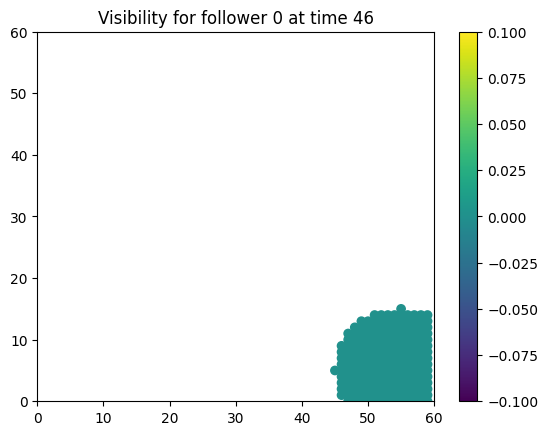

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    41  24  10.000000        10.0         0.0  6.123234e-17        1    47   
202  53  29   5.385165         2.0         5.0  6.630581e-01        1    47   
209  54  17   7.615773         3.0         7.0  3.658198e-01        1    47   
208  54  16   8.544004         3.0         8.0  2.267187e-01        1    47   
207  54  15   9.486833         3.0         9.0  8.052082e-02        1    47   
206  53  33   9.219544         2.0         9.0  1.222868e-01        1    47   
205  53  32   8.246211         2.0         8.0  2.720132e-01        1    47   
204  53  31   7.280110         2.0         7.0  4.143599e-01        1    47   
203  53  30   6.324555         2.0         6.0  5.457949e-01        1    47   
201  53  28   4.472136         2.0         4.0  7.632412e-01        1    47   

     proximity  proximity_standardized  
0            0                     0.0  
202          0                     0.0  

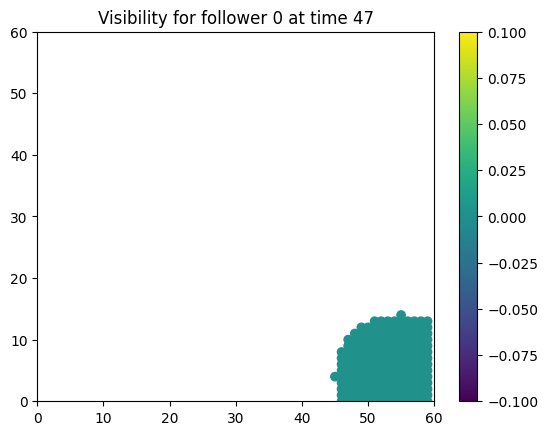

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    43  29  10.000000        10.0         0.0  6.123234e-17        1    48   
184  54  35   6.082763         1.0         6.0  5.772184e-01        1    48   
190  55  22   7.280110         2.0         7.0  4.143599e-01        1    48   
189  55  21   8.246211         2.0         8.0  2.720132e-01        1    48   
188  55  20   9.219544         2.0         9.0  1.222868e-01        1    48   
187  54  38   9.055385         1.0         9.0  1.478359e-01        1    48   
186  54  37   8.062258         1.0         8.0  2.997016e-01        1    48   
185  54  36   7.071068         1.0         7.0  4.440158e-01        1    48   
183  54  34   5.099020         1.0         5.0  6.960234e-01        1    48   
175  54  26   3.162278         1.0         3.0  8.791459e-01        1    48   

     proximity  proximity_standardized  
0            0                     0.0  
184          0                     0.0  

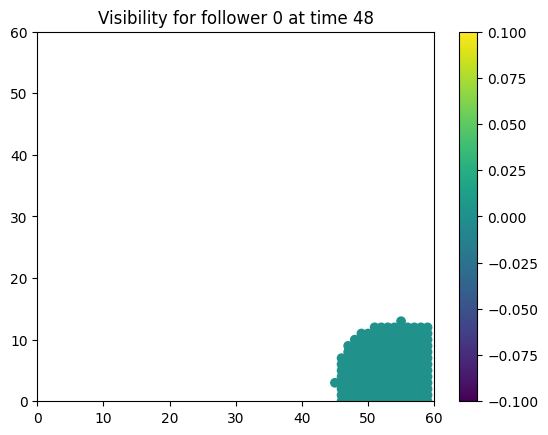

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    44  36  10.000000        10.0         0.0  6.123234e-17        1    49   
164  54  42   6.000000         0.0         6.0  5.877853e-01        1    49   
166  54  44   8.000000         0.0         8.0  3.090170e-01        1    49   
167  54  45   9.000000         0.0         9.0  1.564345e-01        1    49   
168  54  46  10.000000         0.0        10.0  6.123234e-17        1    49   
169  55  27   9.055385         1.0         9.0  1.478359e-01        1    49   
170  55  28   8.062258         1.0         8.0  2.997016e-01        1    49   
171  55  29   7.071068         1.0         7.0  4.440158e-01        1    49   
172  55  30   6.082763         1.0         6.0  5.772184e-01        1    49   
173  55  31   5.099020         1.0         5.0  6.960234e-01        1    49   

     proximity  proximity_standardized  
0            0                     0.0  
164          0                     0.0  

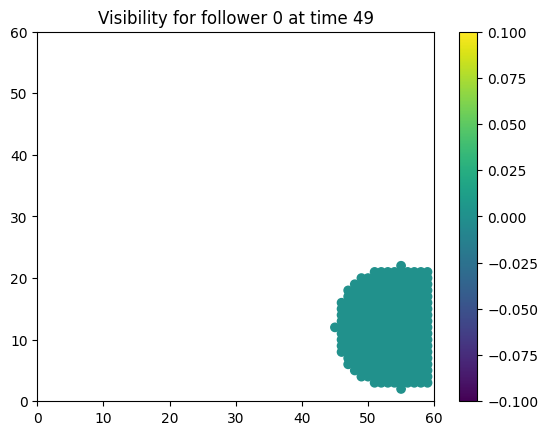

options       x   y   distance  distance_x  distance_y    visibility  forager  time  \
0    34  36  10.000000        10.0         0.0  6.123234e-17        1    50   
209  47  29   7.615773         3.0         7.0  3.658198e-01        1    50   
216  47  36   3.000000         3.0         0.0  8.910065e-01        1    50   
215  47  35   3.162278         3.0         1.0  8.791459e-01        1    50   
214  47  34   3.605551         3.0         2.0  8.438604e-01        1    50   
213  47  33   4.242641         3.0         3.0  7.860321e-01        1    50   
212  47  32   5.000000         3.0         4.0  7.071068e-01        1    50   
211  47  31   5.830952         3.0         5.0  6.090582e-01        1    50   
210  47  30   6.708204         3.0         6.0  4.943389e-01        1    50   
208  47  28   8.544004         3.0         8.0  2.267187e-01        1    50   

     proximity  proximity_standardized  
0            0                     0.0  
209          0                     0.0  

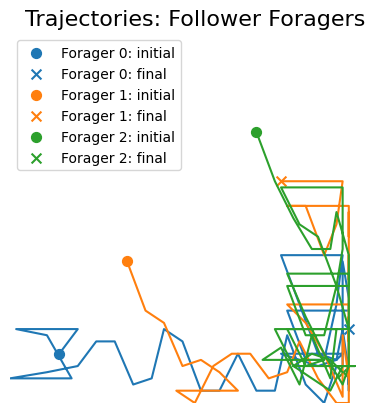

In [2]:
random.seed(23)
np.random.seed(23)

# create a new empty simulation (a starting point for the actual simulation)
grid_size = 60
follower_sim = rhf.Foragers(
    grid_size=grid_size,
    num_foragers=3,
    num_frames=num_frames,
    num_rewards=30,
    grab_range=3,
)

# run the simulation: this places the rewards on the grid
follower_sim()

# add the followers to the simulation and run simulation forward
follower_sim = rhf.add_follower_foragers(
    follower_sim,
    num_follower_foragers=3,
    visibility_range=10,
    getting_worse=.5,
    optimal=3,
    proximity_decay=2,
    initial_positions=np.array([[10, 10], [20, 20], [40, 40]]),
)

# display(follower_sim.foragersDF)
ax = ft.plot_trajectories(follower_sim.foragersDF, "Follower Foragers")
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
plt.show()

Unsurprisingly, all the foragers tend to stay close to each other and do not explore the environment.

In [3]:
ft.animate_foragers(
    follower_sim, width=600, height=400, plot_rewards=True, point_size=6,
    autosize=True
)

## Derived quantities

In [6]:
# We'll use `proximity`, `food` and `access` predictors

local_windows_kwargs = {
    "window_size": 10,
    "sampling_fraction": 1,
    "skip_incomplete_frames": False,
}

predictor_kwargs = {
    "proximity": {
        "interaction_length": follower_sim.grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": {},
        "repulsion_radius": 1.5,
        "optimal_distance": 4,
        "proximity_decay": 1,
    },
    "food": {
        "decay_factor": 0.5,
    },
    "access": {
        "decay_factor": 0.2,
    },
}

score_kwargs = {
    "nextStep_linear": {"nonlinearity_exponent": 1},
    "nextStep_sublinear": {"nonlinearity_exponent": 0.5},
}

derivedDF_hungry = ft.derive_predictors_and_scores(
    follower_sim,
    local_windows_kwargs,
    predictor_kwargs=predictor_kwargs,
    score_kwargs=score_kwargs,
    dropna=True,
    add_scaled_values=True,
)

# display(derivedDF_hungry)

2024-10-28 17:07:07,285 - proximity completed in 0.59 seconds.
2024-10-28 17:07:10,007 - food completed in 2.72 seconds.
2024-10-28 17:07:10,229 - access completed in 0.22 seconds.
2024-10-28 17:07:10,410 - nextStep_linear completed in 0.18 seconds.
2024-10-28 17:07:10,580 - nextStep_sublinear completed in 0.17 seconds.
/home/rafal/s78projects/collab-creatures/collab/foraging/toolkit/derive.py:56: UserWarning:


                      Dropped 951/47519 frames from `derivedDF` due to NaN values.
                      Missing values can arise when computations depend on next/previous step positions
                      that are unavailable. See documentation of the corresponding predictor/score generating
                      functions for more information.
                      



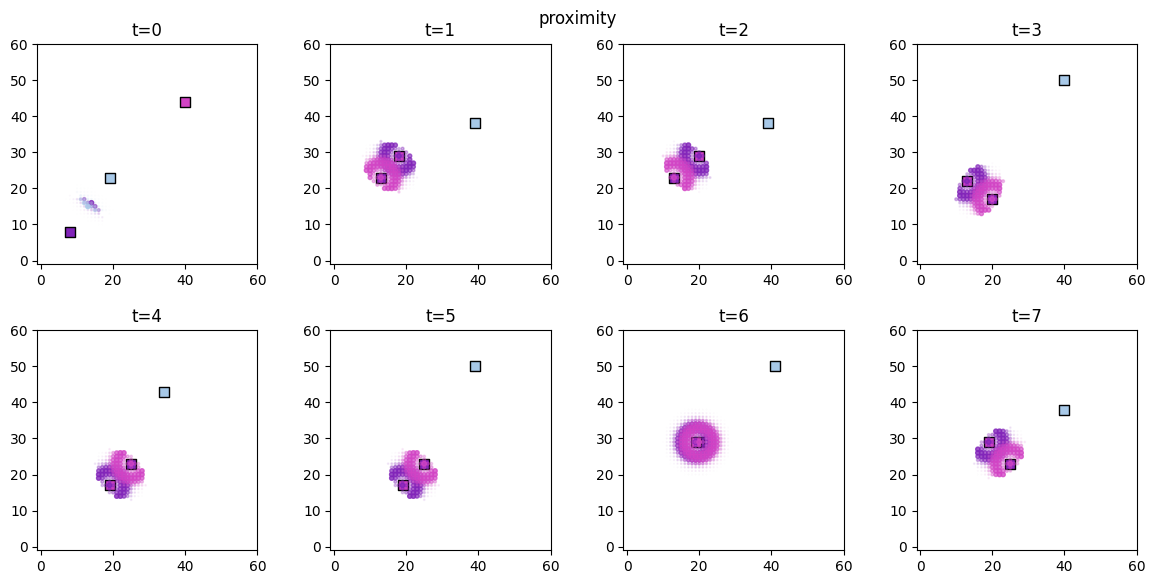

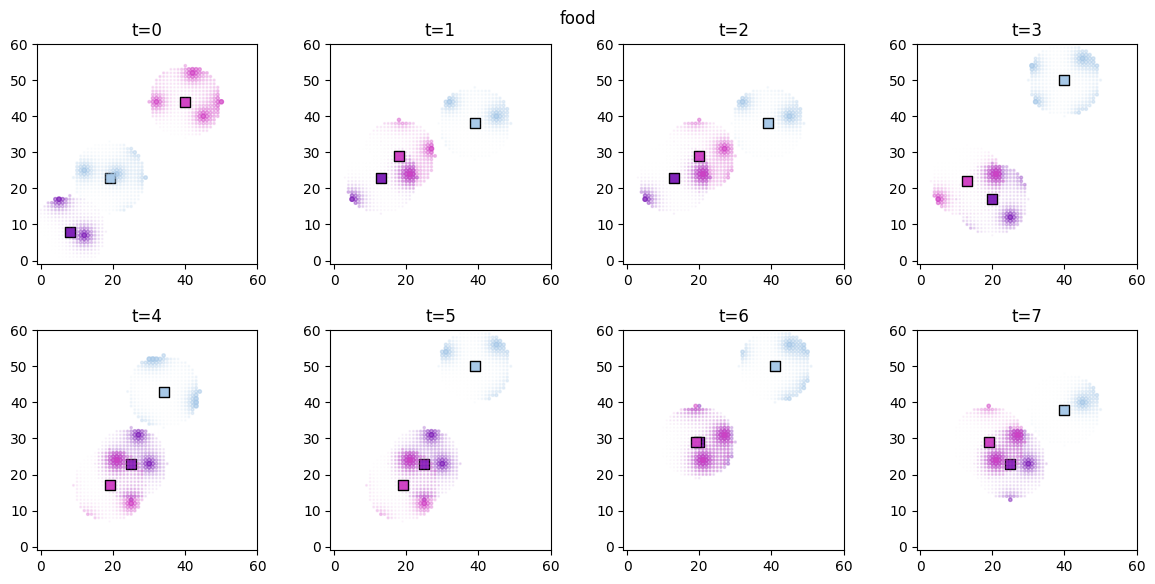

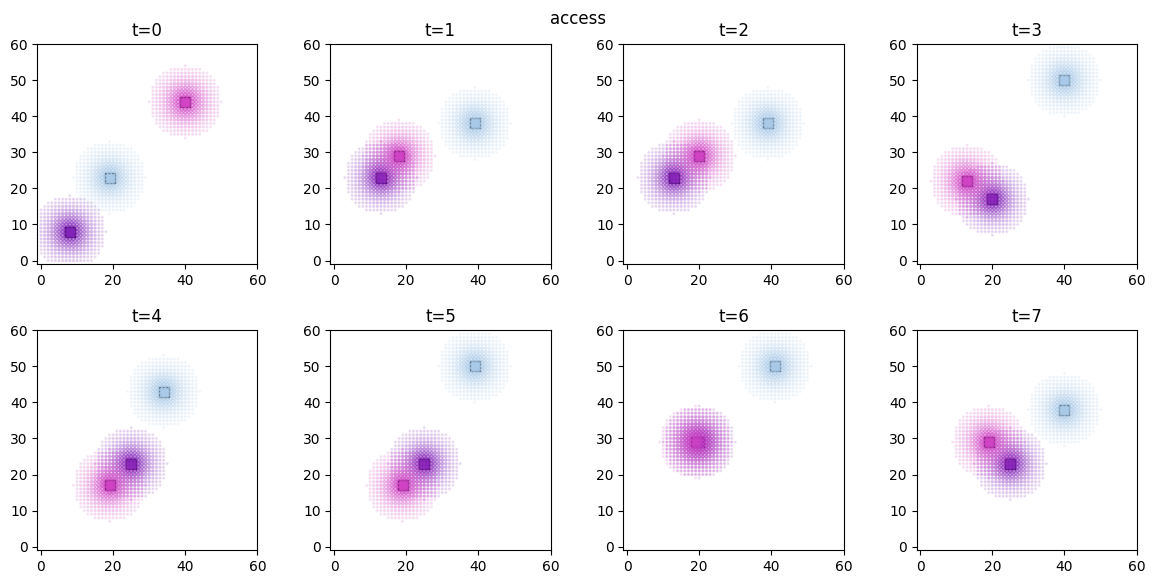

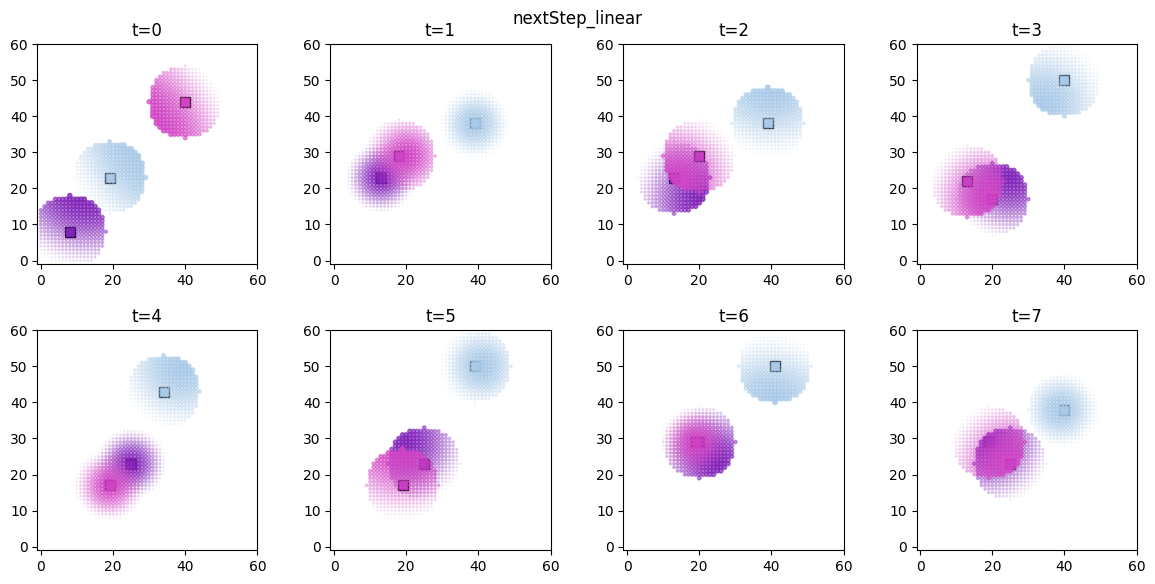

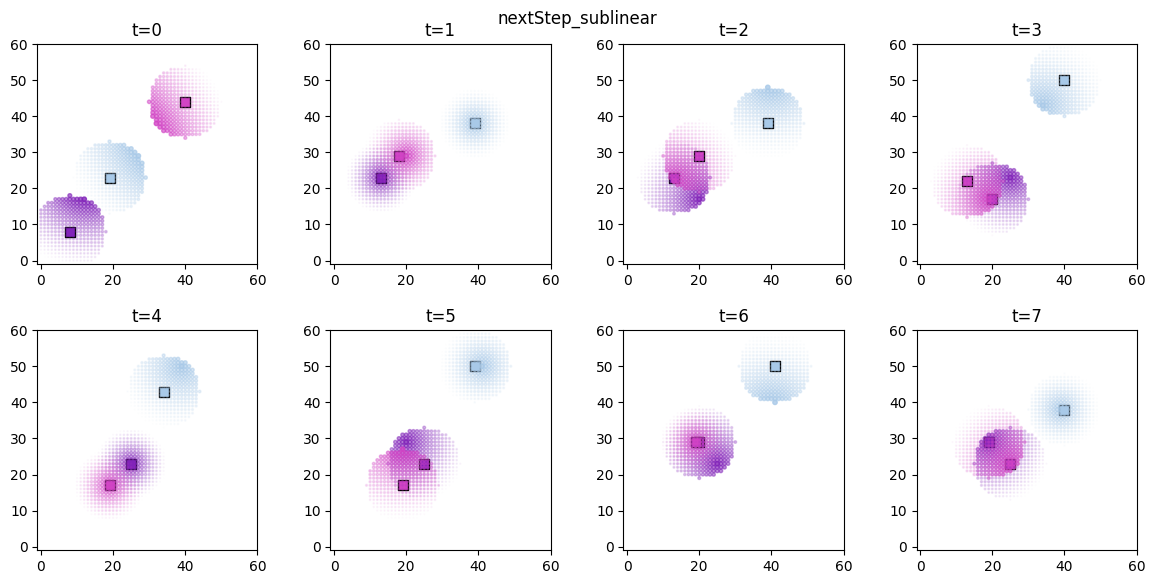

In [7]:
# visualize the spatial distributions of the derived quantities for each forager

for derived_quantity_name in follower_sim.derived_quantities.keys():
    ft.plot_predictor(
        follower_sim.foragers,
        follower_sim.derived_quantities[derived_quantity_name],
        predictor_name=derived_quantity_name,
        time=range(min(8, num_frames)),
        grid_size=grid_size,
        size_multiplier=10,
        random_state=99,
        forager_position_indices=[0, 1, 2],
        forager_predictor_indices=[0, 1, 2],
    )
    plt.suptitle(derived_quantity_name)
    plt.show()

## Inference

2024-10-28 15:41:56,833 - Sample size: 46579
2024-10-28 15:41:56,834 - Starting SVI inference with 1500 iterations.


[iteration 0001] loss: 171636.7500
[iteration 0200] loss: 118194.7422
[iteration 0400] loss: 117138.3047
[iteration 0600] loss: 116770.8984
[iteration 0800] loss: 116844.3672
[iteration 1000] loss: 116756.9297
[iteration 1200] loss: 116830.6797
[iteration 1400] loss: 116767.6172


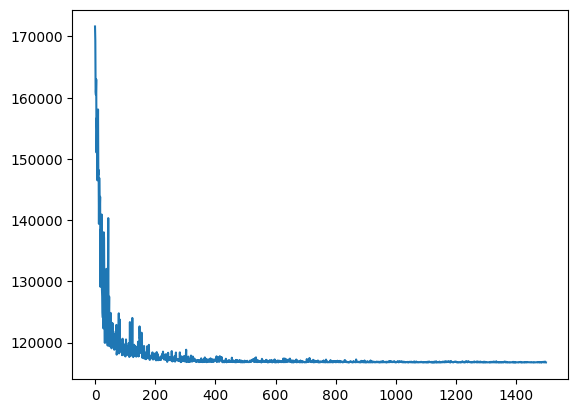

2024-10-28 15:42:06,200 - SVI inference completed in 9.37 seconds.


Coefficient marginals:
Site: weight_continuous_proximity_scaled_nextStep_sublinear
       mean       std        5%       25%       50%       75%       95%
0  0.196394  0.015694  0.170974  0.186028  0.196538  0.206734  0.221458 

Site: weight_continuous_food_scaled_nextStep_sublinear
       mean       std        5%       25%       50%       75%       95%
0 -0.116813  0.013537 -0.137824 -0.126386 -0.116534 -0.107433 -0.095386 

Site: weight_continuous_access_scaled_nextStep_sublinear
       mean       std        5%       25%      50%       75%       95%
0  0.404285  0.014196  0.381239  0.394556  0.40416  0.414433  0.426971 



In [6]:
# prepare the training data

predictors = ["proximity_scaled", "food_scaled", "access_scaled"]
outcome_vars = ["nextStep_sublinear"]


predictor_tensors_follower, outcome_tensor_follower = ft.prep_data_for_inference(
    follower_sim, predictors, outcome_vars
)

# construct Pyro model
model_sigmavar_follower = ft.HeteroskedasticLinear(
    predictor_tensors_follower, outcome_tensor_follower
)

# runs SVI to approximate the posterior and samples from it
results_follower = ft.get_samples(
    model=model_sigmavar_follower,
    predictors=predictor_tensors_follower,
    outcome=outcome_tensor_follower,
    num_svi_iters=1500,
    num_samples=1000,
)

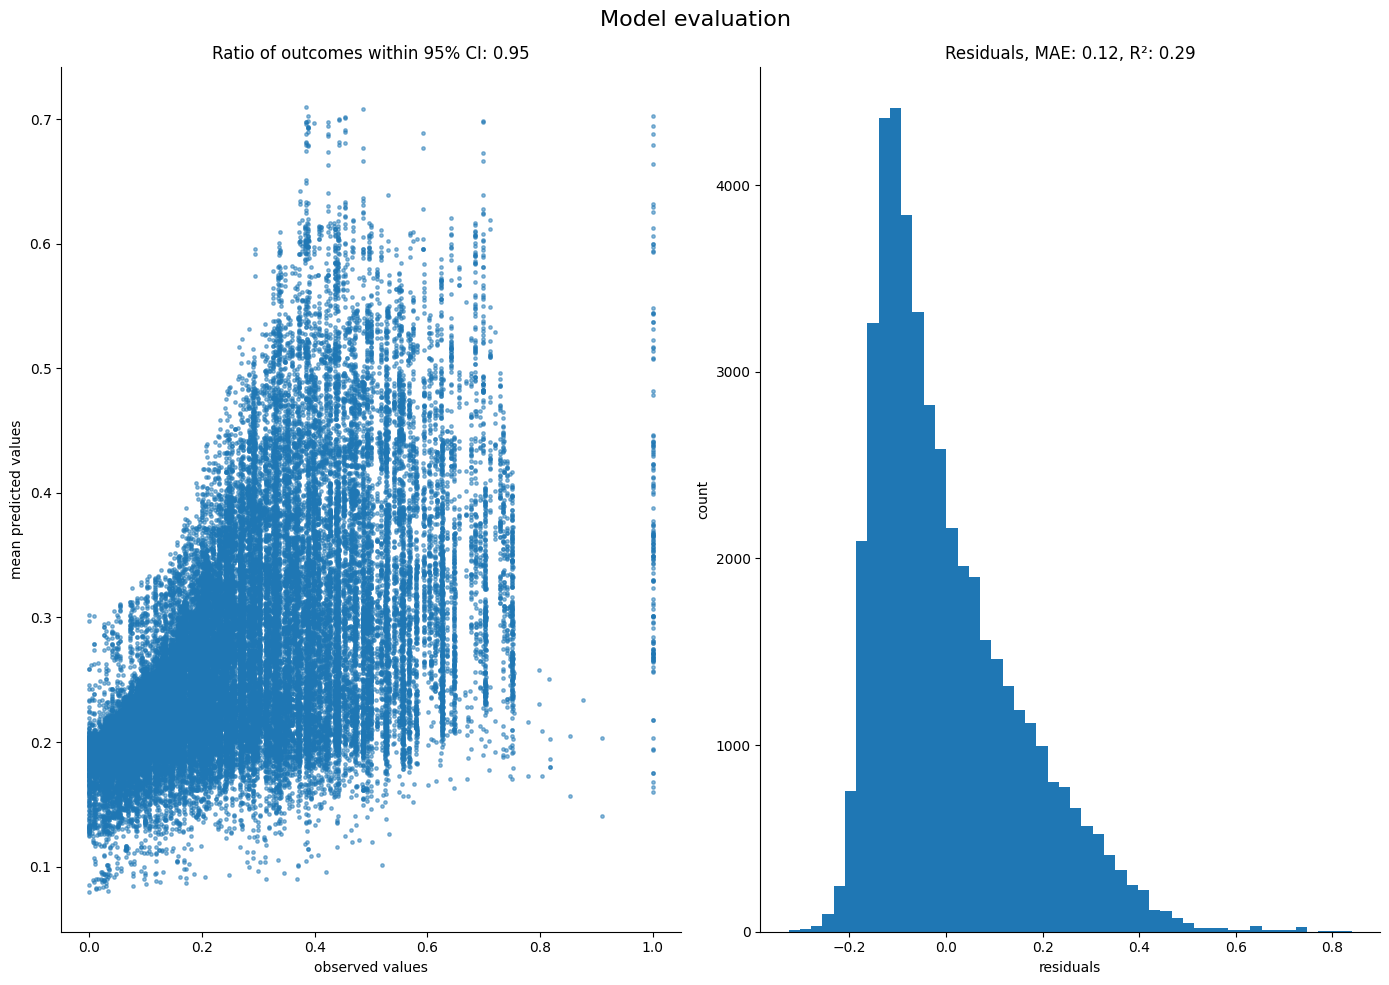

In [7]:
selected_sites = [
    key
    for key in results_follower["samples"].keys()
    if key.startswith("weight") and not key.endswith("sigma")
]
selected_samples = {key: results_follower["samples"][key] for key in selected_sites}

ft.plot_coefs(
    selected_samples, "Follower foragers", nbins=120, ann_start_y=160, ann_break_y=50
)

# save the samples for future use
if not os.path.exists("sim_data/follower_foragers_samples.dill"):
    with open(os.path.join("sim_data", "follower_foragers_samples.dill"), "wb") as f:
        dill.dump(selected_samples, f)

ft.evaluate_performance(
    model=model_sigmavar_follower,
    guide=results_follower["guide"],
    predictors=predictor_tensors_follower,
    outcome=outcome_tensor_follower,
    num_samples=1000,
)

As expected, both `access` and `proximity` are now significant in explaining the agent movements, while `food` has no effect.